# Image processing using OpenCV

In [1]:
#!pip install opencv-python

In [2]:
# After installation Restart the kernel or shutdown and restart

In [3]:
import cv2
import numpy as np

## <font color=blue>Reading images and displaying images

In [4]:
pwd

'/Users/sylvia/Desktop/IITR/M11-CV/Live_lectures/L1'

In [5]:
import os
os.chdir(r"/Users/sylvia/Desktop/datasets/CV")

im = cv2.imread("kitty.jpg")

In [6]:
type(im)

numpy.ndarray

In [7]:
im.shape    # 1836 rows i.e. height and 3264 col's i.e. width

(1836, 3264, 3)

In [8]:
#Array consists of 3 matrices each of 1836 X 3264 
#each of them representing Blue, Green and Red portions of the image

In [9]:
#Opencv always treats images in BGR colorspace
blue_channel = im[: ,:,0] #corresponding to the blue space
print(blue_channel.shape)
blue_channel

(1836, 3264)


array([[192, 192, 191, ..., 127, 130, 129],
       [192, 192, 192, ..., 127, 130, 131],
       [191, 192, 193, ..., 129, 127, 129],
       ...,
       [ 76,  74,  72, ...,  71,  72,  70],
       [ 72,  72,  73, ...,  73,  72,  68],
       [ 68,  71,  73, ...,  77,  75,  70]], dtype=uint8)

In [10]:
green_channel = im[: ,:,1] #corresponding to the green space
print(green_channel.shape)
green_channel

(1836, 3264)


array([[187, 187, 186, ..., 140, 141, 140],
       [187, 187, 187, ..., 140, 141, 142],
       [186, 187, 187, ..., 140, 138, 140],
       ...,
       [ 87,  85,  83, ...,  74,  75,  73],
       [ 85,  85,  84, ...,  76,  73,  69],
       [ 81,  84,  84, ...,  80,  76,  71]], dtype=uint8)

In [11]:
red_channel = im[: ,:,2] #Corresponding to the Red Space
print(red_channel.shape)
red_channel

(1836, 3264)


array([[172, 172, 171, ..., 138, 139, 138],
       [172, 172, 172, ..., 138, 139, 140],
       [171, 172, 174, ..., 138, 136, 138],
       ...,
       [ 95,  93,  91, ...,  88,  89,  87],
       [ 93,  93,  92, ...,  90,  87,  83],
       [ 89,  92,  92, ...,  94,  90,  85]], dtype=uint8)

In [97]:
#matplotlib is used to visualize these images
import matplotlib.pyplot as plt

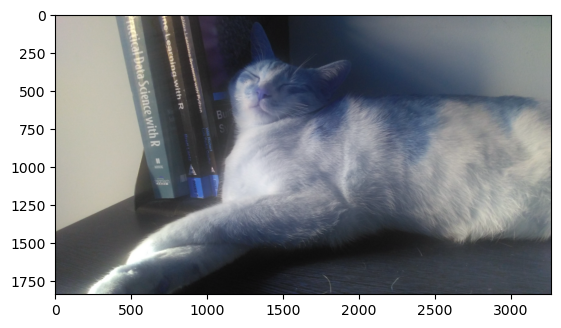

In [13]:
#Using matplotlib to display the image
plt.imshow(im);

## <font color=blue>Converting from one color space to another

In [14]:
#converting an image from BGR to RGB space
im_rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

In [15]:
#3 channels corresponding to Red, green and blue
im_rgb.shape

(1836, 3264, 3)

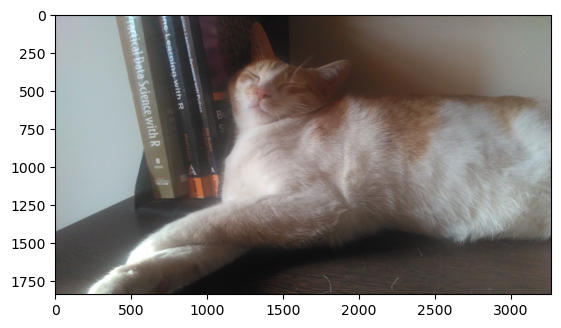

In [16]:
plt.imshow(im_rgb);

In [17]:
#converting an image from BGR to grayscale
im_grayscale = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
#has a single channel
im_grayscale.shape

(1836, 3264)

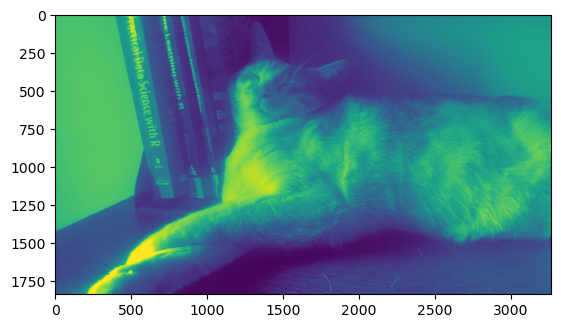

In [18]:
#color map argument of imshow is to be explicitly set to gray to display grayscale images
plt.imshow(im_grayscale);

(1836, 3264)

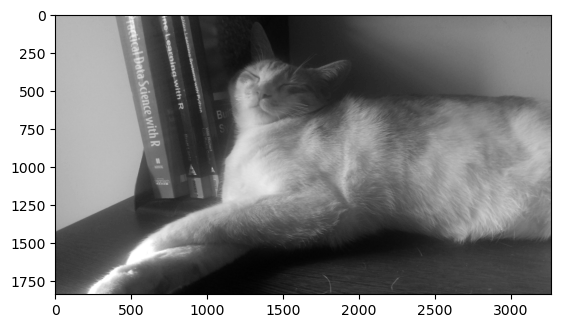

In [19]:
# For greyscale image we always need to put cmap="gray" as plt needs this

plt.imshow(im_grayscale,cmap="gray");
im_grayscale.shape

## <font color=blue>Image Augmentation 

Its a technique used for available images to produce new images by applying image operations like:

    1.Image Scaling
    2.Image Rotation
    3.Image Translation

## 1. Image Scaling

In [20]:
#Photos by mordern devices have very large resolution
#performing mathematical models(ML algorithms) on these images can
# be computationally expensive
#we can resize the image to reduce the number of data points, 
# we have to work with
#cv2.INTER_AREA - zooms the image
#cv2.INTER_LINEAR - shrinks the image


In [21]:
im_resized = cv2.resize(im,(800,800),cv2.INTER_AREA)

In [22]:
im_resized.shape

(800, 800, 3)

In [23]:
#Displaying images in a seperate window
cv2.imshow('ImageWindow1', im_resized)
cv2.waitKey()

107

In [24]:
#Destroying the window just opened
cv2.destroyWindow('ImageWindow1')

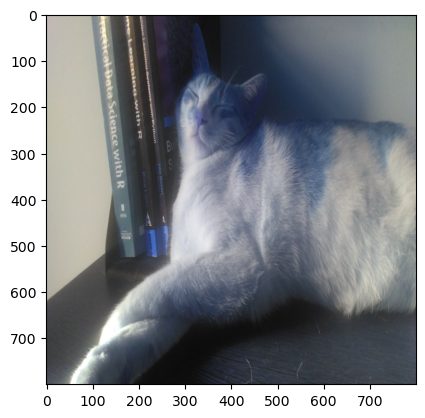

In [25]:
plt.imshow(im_resized);

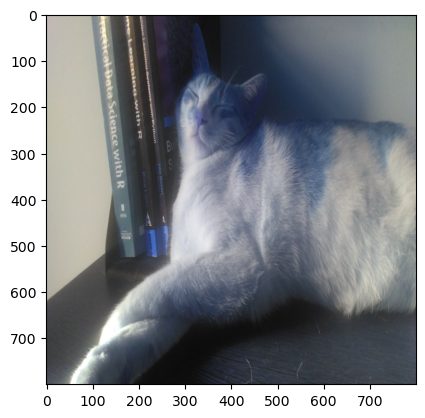

In [26]:
im_resized1 = cv2.resize(im,(800,800),cv2.INTER_LINEAR)
plt.imshow(im_resized1);

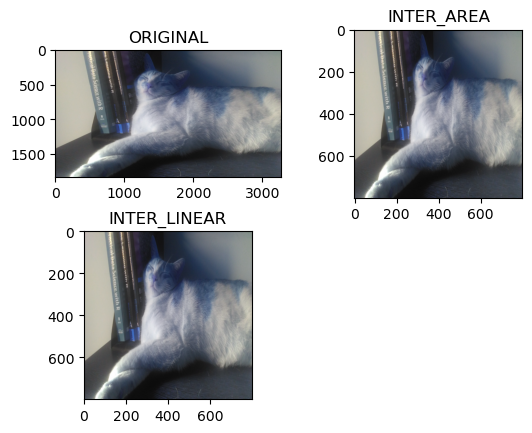

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("kitty.jpg")
img1 = cv2.resize(img,   (800, 800), cv2.INTER_AREA)
img2 = cv2.resize(img,   (800, 800), cv2.INTER_LINEAR)


title_arr = ["ORIGINAL", "INTER_AREA", "INTER_LINEAR"]
img_arr = [img, img1, img2]
count = 3

for i in range(count):
    plt.subplot(2, 2, i+1)
    plt.title(title_arr[i])
    plt.imshow(img_arr[i])

plt.show()

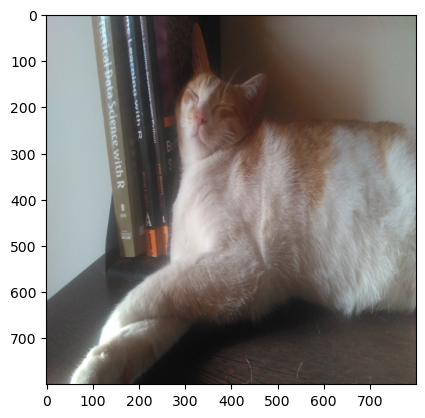

In [28]:
# To change to RGB using matplotlib

plt.imshow(im_resized[...,::-1]);   
# Start reading from last matrix in 3D matrix


## 2. Cropping of images

Cropping image by subsetting a matrix

In [29]:
flower = cv2.imread("flower.jpg")

In [30]:
flower.shape

(333, 500, 3)

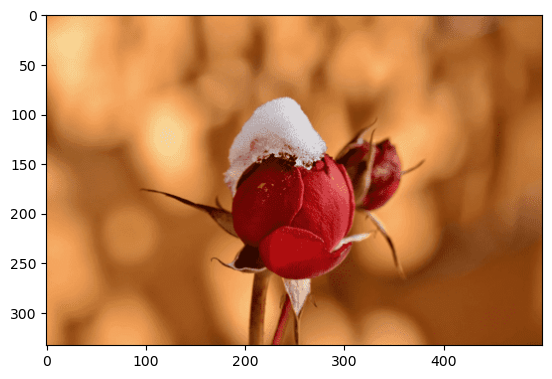

In [31]:
plt.imshow(flower[...,::-1]);

In [32]:
cropped_image = flower[80:, 150:330]

In [33]:
cropped_image.shape

(253, 180, 3)

In [34]:
# cv2.imshow("cropped", cropped_image)
# cv2.waitKey(0)
#cv2.destroyAllWindows()

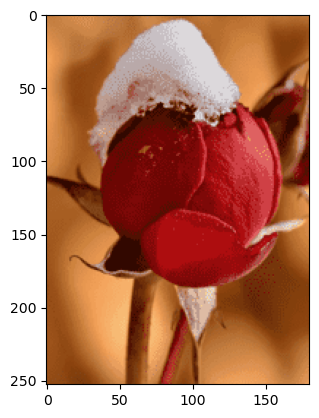

In [35]:
plt.imshow(cropped_image[...,::-1]);

## 3. Image Rotation

Step1: Get the rotation matrix

    1. Obtain the center of the image (cols/2, rows/2)
    2. Specify angle of rotation - +ve for anti-clockwise and -ve for clockwise rotation
    3. specify the scale - scale the image according to the value specified

Step2 : Apply the transformation using wrapAffine by passing:
        
        1. The image to be rotated, 
        2. Rotation matrix 
        3. Tuple of columns and rows

Scaling factor for zooming of image.

In [36]:
im_rgb.shape

(1836, 3264, 3)

In [37]:
rows,cols = im_rgb.shape[0:2]   # 0 & 1 index extracted i.e rows, cols
print(rows,cols)

1836 3264


In [38]:
rot_mat = cv2.getRotationMatrix2D((cols/2,rows/2),-45,1) #Centerofimage, Angle of rotation, Scaling factor


In [39]:
rot_image = cv2.warpAffine(im_rgb,rot_mat,(cols,rows))

In [40]:
rot_image.shape

(1836, 3264, 3)

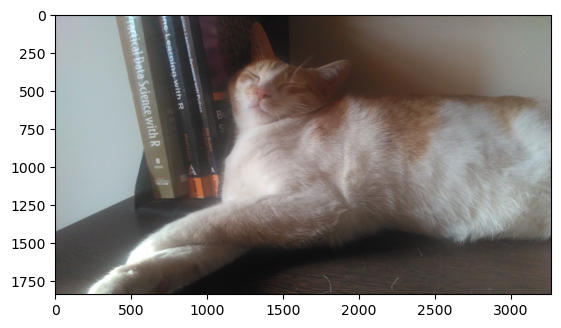

In [41]:
plt.imshow(im_rgb)
plt.show()

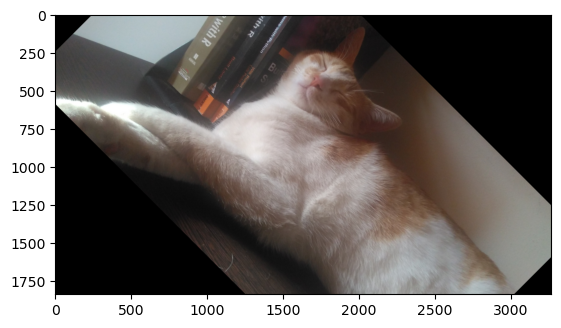

In [42]:
plt.imshow(rot_image)
plt.show()

## <font color=green>Assignment1 : 

    1. Read the image Trump.jpg
    2.a Display the image using matplotlib and cv2.imshow and Observe the difference
    2.b Without changing the colorspace display the image as an RGB image
    3. Convert the image to grayscale and display using matplotlib
    4. Rotate the image 45 degress clockwise with scaling factor of 1.5

In [43]:
# 1. Read the image Trump.jpg
trump = cv2.imread("Trump.jpg")

In [44]:
trump.shape

(465, 342, 3)

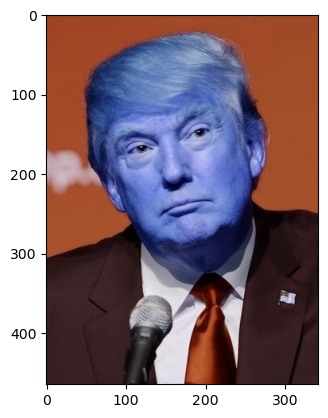

In [45]:
# 2.a Display the image using matplotlib and cv2.imshow and Observe
# the difference
plt.imshow(trump);


In [46]:
cv2.imshow("trump", trump)
cv2.waitKey()

109

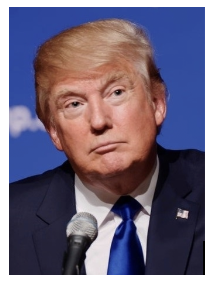

In [47]:
cv2.destroyWindow("trump")     

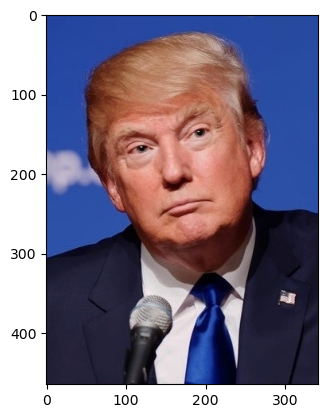

In [48]:
#2.b Without changing the colorspace display the image as an RGB image

plt.imshow(trump[...,::-1]);

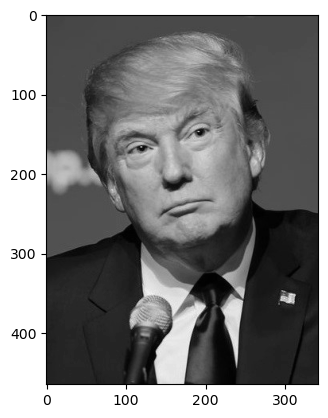

In [49]:
# 3. Convert the image to grayscale and display using matplotlib

img_grey = cv2.cvtColor(trump, cv2.COLOR_BGR2GRAY)
plt.imshow(img_grey,cmap="gray");

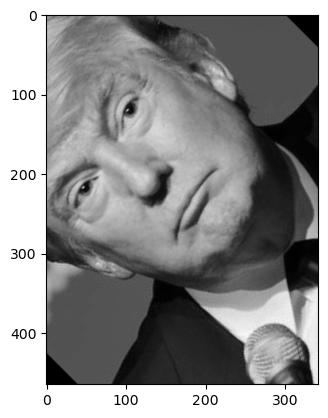

In [50]:
# 4. Rotate the image 45 degress clockwise with scaling factor of 1.5

rows,cols = img_grey.shape[0:2]
rot_mat = cv2.getRotationMatrix2D((cols/2,rows/2),45,1.5)
# +ve so anti-clockwise

rot_image = cv2.warpAffine(img_grey,rot_mat,(cols,rows))

plt.imshow(rot_image, cmap='gray')
plt.show()

## 4. Image Translation

Translation of an image means shifting it by a specified number of pixels, along the x and y axes. maps every object in the image to a new location.

For translating an image a matrix needs to be supplied which will shift the image by tx and ty

\begin{equation*} M = \begin{bmatrix} 1 & 0 & t_x \\ 0 & 1 & t_y \end{bmatrix} \end{equation*}

 - Providing positive values for tx will shift the image to right and negative values will shift the image to the left.
 - Similarly, positive values of ty will shift the image down while negative values will shift the image up.


In [51]:
obama = cv2.imread("obama.jpg")

In [52]:
obama_rgb = cv2.cvtColor(obama, cv2.COLOR_BGR2RGB)

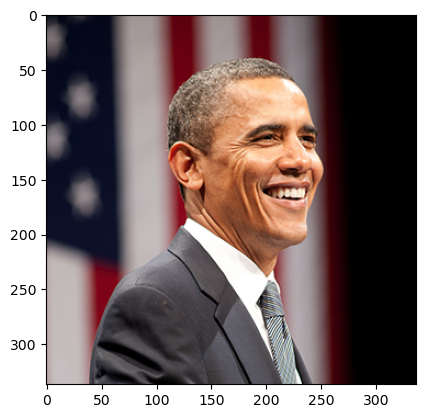

In [53]:
plt.imshow(obama_rgb)
plt.show()

In [54]:
rows,cols = obama_rgb.shape[0:2]
print(rows,cols)

337 337


In [55]:
N = np.float32([[1,0,-35],
              [0,1,-75]])
dst = cv2.warpAffine(obama_rgb,N,(cols,rows))

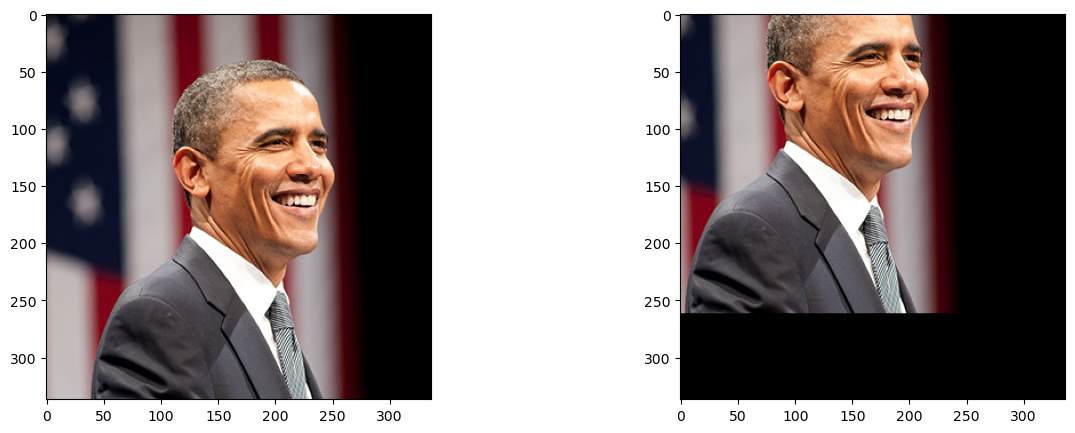

In [56]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15,5)) # to refer to each, use indexing
ax[0].imshow(obama_rgb)

ax[1].imshow(dst);


In [57]:
N = np.float32([[1,0,35],
              [0,1,75]])
dst1 = cv2.warpAffine(obama_rgb,N,(cols,rows))

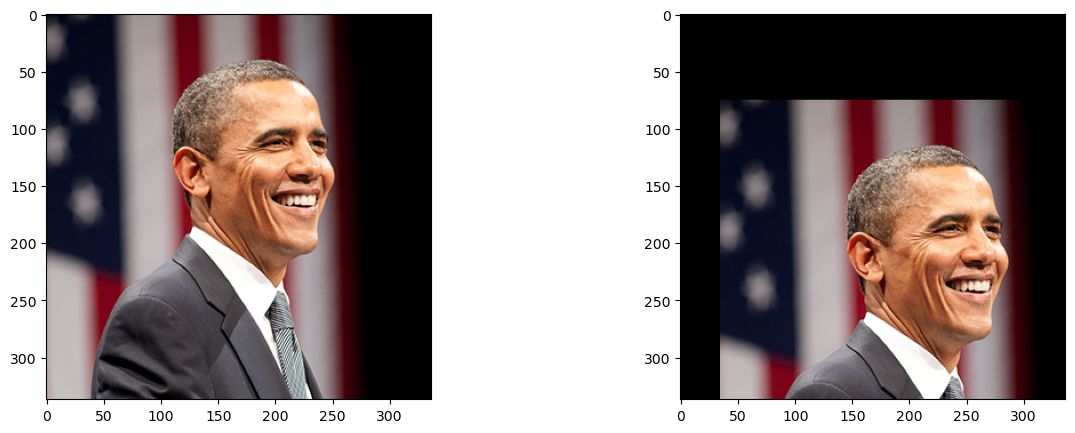

In [58]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15,5)) # to refer to each, use indexing
ax[0].imshow(obama_rgb)

ax[1].imshow(dst1);

## <font color=green>Assignment2: 

### Read the image skoda.jpg. Translate the image such that the number plate is visible at the center

In [59]:
img_scoda = cv2.imread('Skoda.jpg')

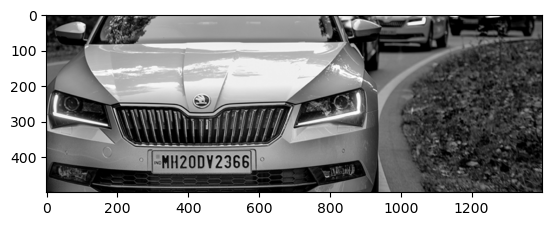

In [60]:
plt.imshow(img_scoda);

In [61]:
rows,cols = img_scoda.shape[0:2]
print(rows,cols)

500 1400


In [62]:
N1 = np.float32([[1,0,150],
              [0,1,-150]])
dst2 = cv2.warpAffine(img_scoda,N1,(cols,rows))

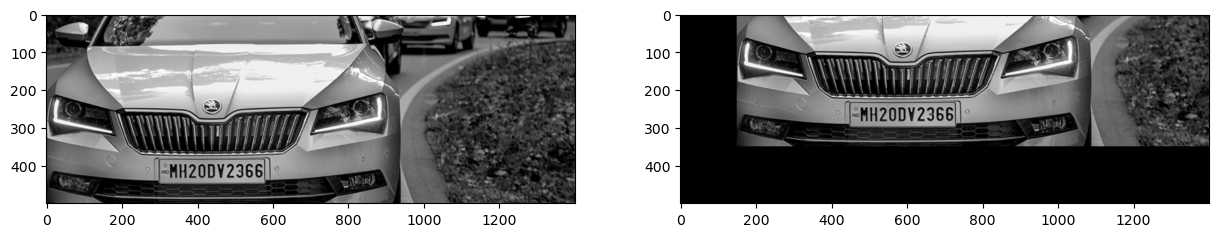

In [63]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15,5)) # to refer to each, use indexing
ax[0].imshow(img_scoda)

ax[1].imshow(dst2);


## Creating Predictor matrix from multiple images

 Steps:
 
        1. Convert image to grayscale
        2. Resize all images, such that every image is of uniform shape
        3. Flatten images
        4. concatenate all the flattened image arrays into a single matrix

In [64]:
five= cv2.imread("five.jpg")

In [65]:
# OpenCv assumes this as a colored image and creates it as a
# multi-dimensional array
five.shape

(225, 225, 3)

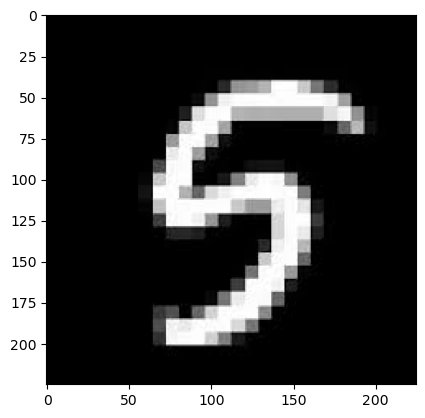

In [66]:
plt.imshow(five);

In [67]:
seven=cv2.imread("seven.png")
seven.shape

(225, 225, 3)

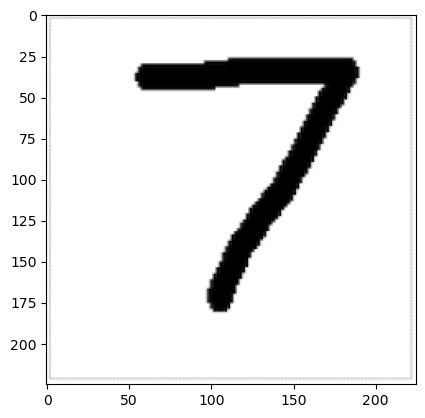

In [68]:
plt.imshow(seven);

In [69]:
two = cv2.imread("two.jpg")
two.shape

(225, 224, 3)

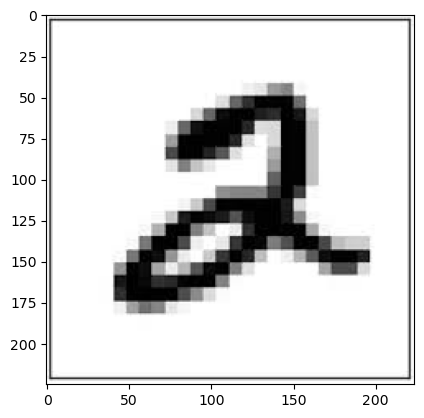

In [70]:
plt.imshow(two);

In [71]:
#Explicitly convert to grayscale image

In [72]:
five_gray = cv2.cvtColor(five,cv2.COLOR_BGR2GRAY)
seven_gray = cv2.cvtColor(seven,cv2.COLOR_BGR2GRAY)
two_gray = cv2.cvtColor(two,cv2.COLOR_BGR2GRAY)

In [73]:
print(five_gray.shape)
print(seven_gray.shape)
print(two_gray.shape)

(225, 225)
(225, 225)
(225, 224)


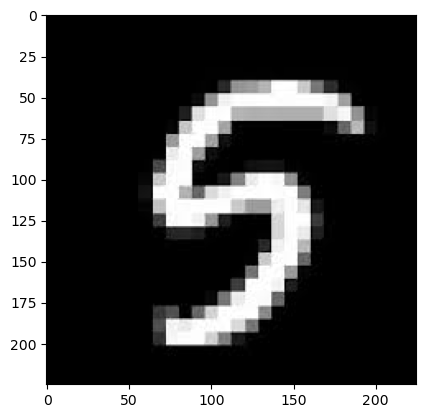

In [74]:
#plt the grascale images
plt.imshow(five_gray,cmap="gray")
plt.show()

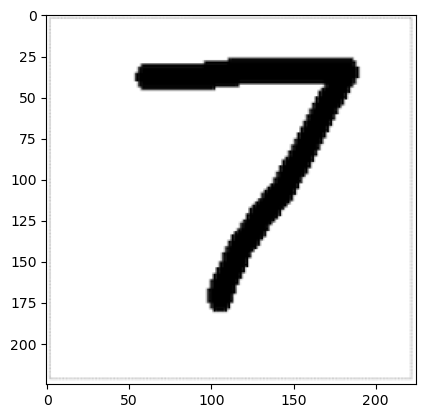

In [75]:
plt.imshow(seven_gray,cmap="gray")
plt.show()

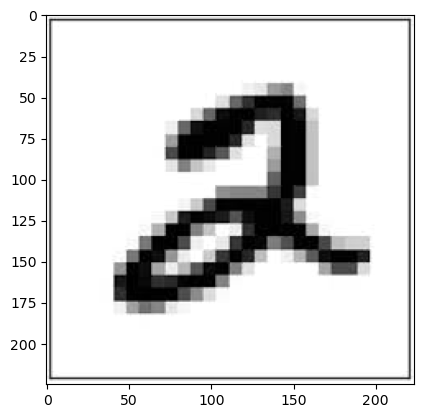

In [76]:
plt.imshow(two_gray,cmap="gray")
plt.show()

In [77]:
#Resize the grayscale images to 100 X 100
two_gray_re = cv2.resize(two_gray,(100,100),cv2.INTER_LINEAR)
five_gray_re = cv2.resize(five_gray,(100,100),cv2.INTER_LINEAR)
seven_gray_re = cv2.resize(seven_gray,(100,100),cv2.INTER_LINEAR)

In [78]:
print(two_gray_re.shape)
print(five_gray_re.shape)
print(seven_gray_re.shape)

(100, 100)
(100, 100)
(100, 100)


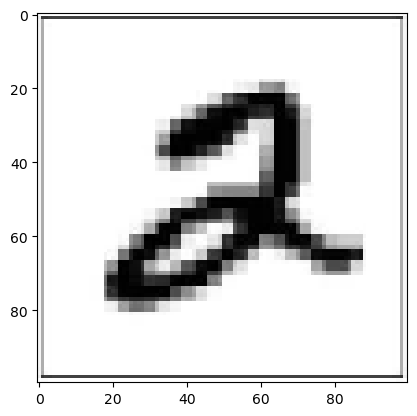

In [79]:
# Plt the resized images
plt.imshow(two_gray_re,cmap="gray")
plt.show()

## Understanding flatten and reshape

In [80]:
#Understanding the working of flatten and reshape
arr = np.array([[1,2,3,4,5,6],[6,7,8,9,10,11]])  # 2d array,2*6
print(arr.shape)
arr

(2, 6)


array([[ 1,  2,  3,  4,  5,  6],
       [ 6,  7,  8,  9, 10, 11]])

In [81]:
arr1=arr.flatten()   # 2d changed to 1d
print(arr1)
print('shape',arr1.shape)    # In 1d we just have number of elements in list
                     # shape=(12,) 

[ 1  2  3  4  5  6  6  7  8  9 10 11]
shape (12,)


In [82]:
arr2=arr.reshape((12))  # Only number of elements provided, changes to 1D
print(arr2)
print(arr2.shape)

[ 1  2  3  4  5  6  6  7  8  9 10 11]
(12,)


In [83]:
arr2=arr.reshape((4,3))   # 4 rows and 3 col's
print(arr2)
print(arr2.shape)

[[ 1  2  3]
 [ 4  5  6]
 [ 6  7  8]
 [ 9 10 11]]
(4, 3)


In [84]:
arr3=arr.reshape((2,3,2))
print(arr3)
print(arr3.shape)

[[[ 1  2]
  [ 3  4]
  [ 5  6]]

 [[ 6  7]
  [ 8  9]
  [10 11]]]
(2, 3, 2)


## Flatten images

In [85]:
# flatten images into one dimensional array
five_flat=five_gray_re.flatten()
two_flat = two_gray_re.flatten()
seven_flat=seven_gray_re.flatten()

In [86]:
print(five_flat.shape)
print(two_flat.shape)
print(seven_flat.shape)

(10000,)
(10000,)
(10000,)


In [87]:
flattened_images = np.vstack((two_flat,five_flat,seven_flat))
flattened_images

array([[250, 255, 253, ..., 251, 251, 254],
       [  0,   0,   0, ...,   0,   0,   0],
       [255, 249, 248, ..., 255, 255, 255]], dtype=uint8)

In [88]:
flattened_images.shape

(3, 10000)

In [89]:
flattened_images[2,:]   # last row and all columns

array([255, 249, 248, ..., 255, 255, 255], dtype=uint8)

In [90]:
#conclusion : we have 3 grayscale images each 100X100

In [91]:
#stored on computer as flat file - convert to dataframe

In [92]:
import pandas as pd
flattened_df = pd.DataFrame(flattened_images)
flattened_df.head()

0     1     2     3     4     5     6     7     8     9     ...  9990  \
0   250   255   253   253   255   255   255   255   255   255  ...   255   
1     0     0     0     0     0     0     0     0     0     0  ...     0   
2   255   249   248   248   248   249   248   248   249   249  ...   255   

   9991  9992  9993  9994  9995  9996  9997  9998  9999  
0   255   255   255   255   255   255   251   251   254  
1     0     0     0     0     0     0     0     0     0  
2   255   255   255   255   255   255   255   255   255  

[3 rows x 10000 columns]

In [93]:
flattened_df.to_csv("flattened_images.csv",index=False,columns=None)

**Note**

**Printing flatenned images, Flatenned images cannot be displayed directly, it needs to be reshaped into a matrix**

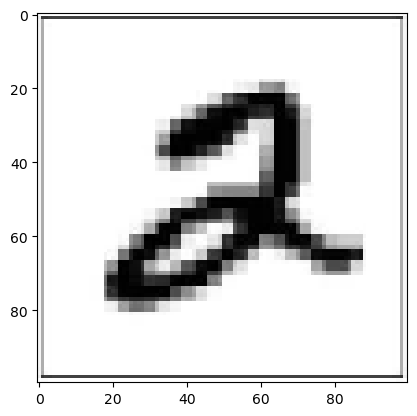

In [94]:
#plot the first flatenned image
plt.imshow(flattened_images[0].reshape((100,100)),cmap="gray")
plt.show()

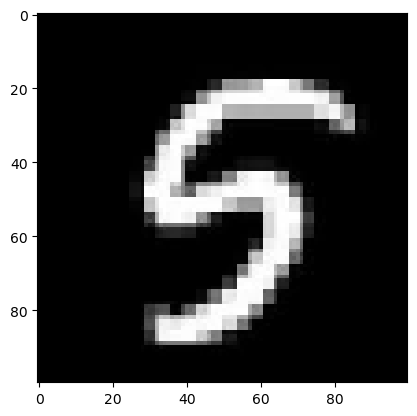

In [95]:
plt.imshow(flattened_images[1].reshape((100,100)),cmap="gray")
plt.show()

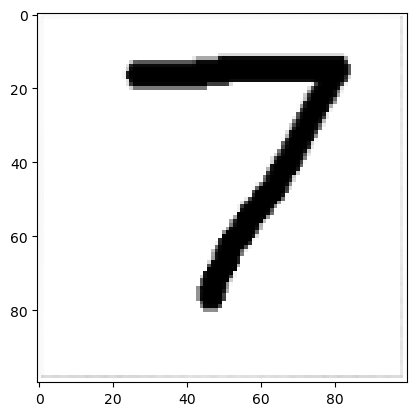

In [96]:
plt.imshow(flattened_images[2].reshape((100,100)),cmap="gray")
plt.show()